In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB02_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB02.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

,time,ammonia nitrogen
0,0.000000,0.109894
1,0.002903,0.007189
2,0.005805,0.007189
3,0.008708,0.075659
4,0.011610,0.075659
...,...,...
287,0.986938,0.007189
288,0.989841,0.007189
289,0.993469,0.007189
290,0.996327,0.007189


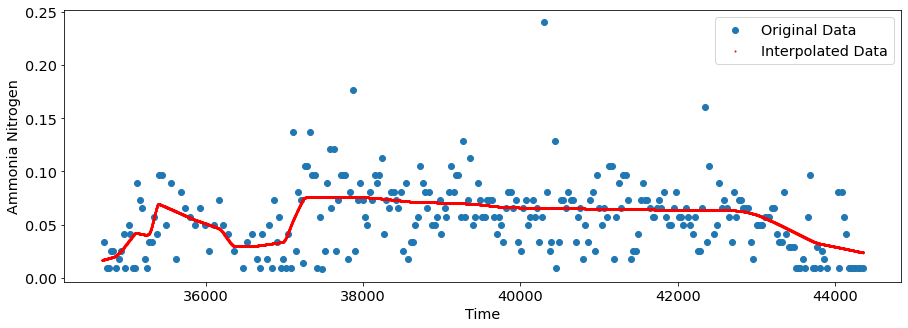

313/313 [==============================] - 0s 340us/step - loss: 1.3592e-16
['loss']


In [4]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.24
time_min = 34710.00 
time_max = 44356.37 

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [5]:
interpolation = model.predict([0.078681444
,0.084797656
,0.091121198
,0.097444739
,0.103768281
,0.110091822
,0.116519029
,0.122635241
,0.128958783
,0.138495927
,0.141605866
,0.147929407
,0.154356613
,0.160472826
,0.166796367
,0.173119909
,0.176333512
,0.179443451
,0.185766992
,0.192194198
,0.198414075
,0.211061159
,0.801016489
,0.955684096
,0.958794035
,0.962007638
])
interpolation

array([[0.25613827],
       [0.24810034],
       [0.23942548],
       [0.23075065],
       [0.2220758 ],
       [0.21340096],
       [0.20458385],
       [0.19757614],
       [0.1907438 ],
       [0.1804393 ],
       [0.17707911],
       [0.16994168],
       [0.15710986],
       [0.1312454 ],
       [0.1054744 ],
       [0.09430171],
       [0.09387477],
       [0.09382533],
       [0.09372482],
       [0.0945937 ],
       [0.09595291],
       [0.10042183],
       [0.23978594],
       [0.09670871],
       [0.09479357],
       [0.09281459]], dtype=float32)